Домашнє завдання Тема 10
# Вивченя моделі сумішей Гаусса

Завдання (крок за кроком)

1. Інсталювати та імпортувати необхідні бібліотеки. Необхідно буде інсталювати такі пакети

        !pip install plotly==5.20.0
        !pip install "jupyterlab>=3" "ipywidgets>=7.6"

2. Завантажити дані з набору https://www.kaggle.com/datasets/unsdsn/world-happiness.



        !wget -O WorldHappinessReport.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true



3. Розпакувати дані



!unzip WorldHappinessReport.zip



4. Прочитати дані та відобразити загальну інформацію про статистики та типи ознак.

5. Побудувати діаграми розподілу числових ознак. Проаналізувати на відповідність чи не відповідність нормальному розподілу.

6. Виходячи із розуміння домену та даних відібрати певну кількість числових ознак та відобразити кореляційну матрицю (див. Тема 4. Вимірювання відстаней та подібностей в аналізі даних)

7. Зробити висновок про наявність та силу лінійного зв'язку між ознаками.

8. Відобразити розподіл цільової ознаки (Happiness.Score або Happiness.Rank) за країнами. Використовуючи наведений нижче код для побудови теплової мапи.



fig = px.choropleth(data_dataframe,
                    locations = "Country",
                    color = "Happiness.Score",
                    locationmode = "country names",
                    )
fig.update_layout(title = "Happiness Index 2017")
fig.show()



9. Застосувати стандартизацію даних для приведення всіх значень до одного діапазону статистик. Використовуючи функцію data_scale() та наступні перетворення



def data_scale(data, scaler_type='minmax'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    if scaler_type == 'std':
        scaler = StandardScaler()
    if scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res

data_scaled = data_scale(original_dataframe)
df_scaled = pd.DataFrame(data_scaled, columns=[original_dataframe.columns])
print(df_scaled.head())



10. Відобразити статистики отриманого стандартизованого набору даних та порівняти зі статистиками оригінального набору даних. Зробити висновки.

11. Побудувати модель кластеризації засобами функції GaussianMixture() бібліотеки sklearn.

12. Побудувати теплову мапу для відображення розподілу країн за кластерами.

13. Дослідити вплив різного набору ознак на результат кластеризації.

14. Зробити загальний висновок про відповідність результатів кластеризації оригінальному розподілу країн за ознакою



In [2]:
!pip install plotly==5.20.0
!pip install "jupyterlab>=3" "ipywidgets>=7.6"

import pandas as pd
import numpy as np
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━

In [233]:
# Завантажуння даних з набору https://www.kaggle.com/datasets/unsdsn/world-happiness
!wget -O WorldHappinessReport.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true

--2024-08-26 06:56:31--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/main/WorldHappinessReport.zip [following]
--2024-08-26 06:56:31--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/main/WorldHappinessReport.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/main/WorldHappinessReport.zip [following]
--2024-08-26 06:56:32--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/main/WorldHappinessReport.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108

In [4]:
# Розпакування даних
!unzip WorldHappinessReport.zip

Archive:  WorldHappinessReport.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


In [234]:
df = pd.read_csv('./2019.csv')
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [235]:
print(df.shape)
df.head()

(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


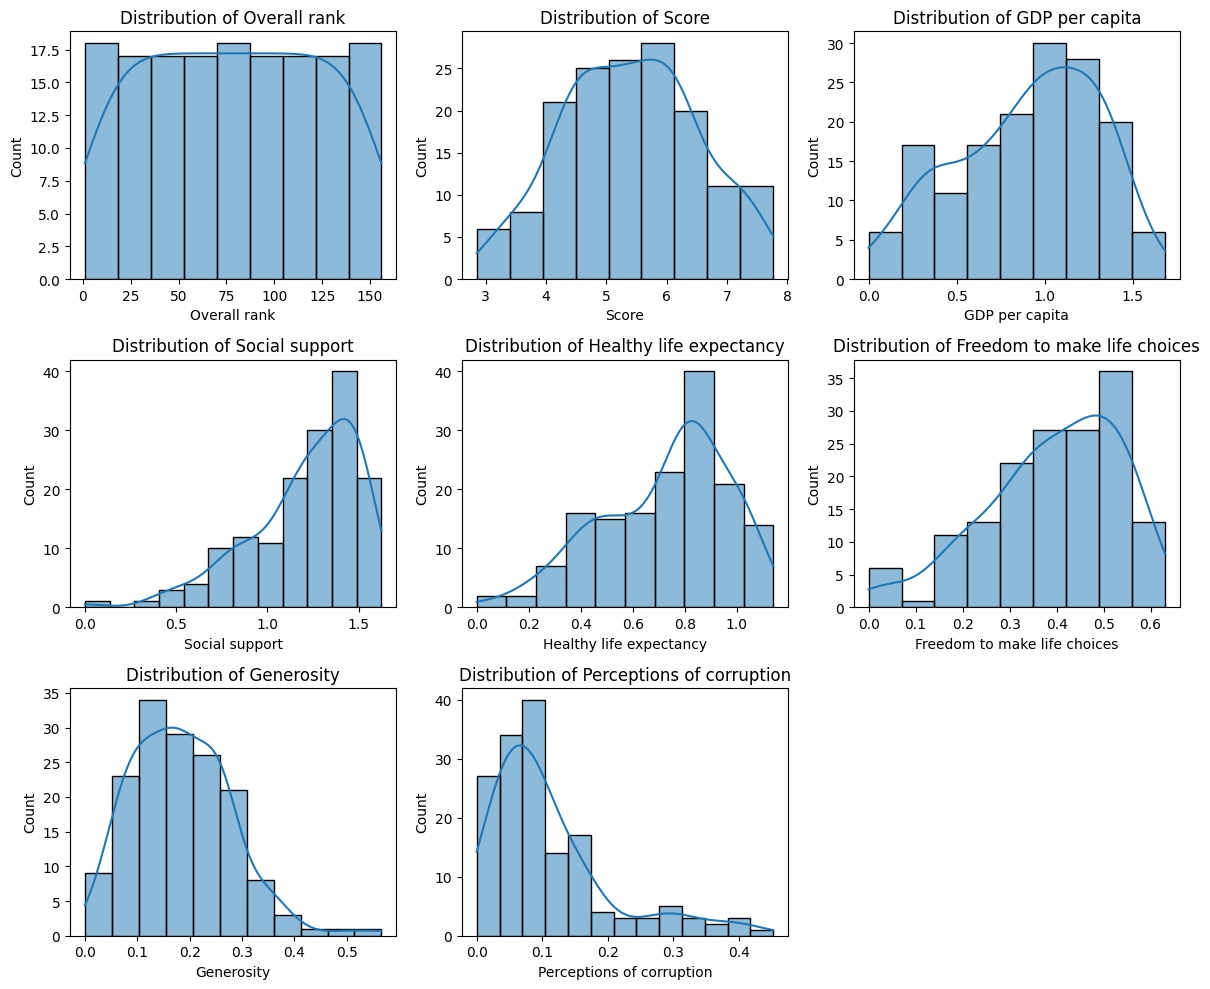

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гістограма і графік щільності: Якщо розподіл близький до дзвонової кривої, це може вказувати на нормальність.

# Вибір лише числових ознак для аналізу
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Побудова діаграм розподілу для кожної числової ознаки
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Нормальним можна вважат тільки розподіл Score

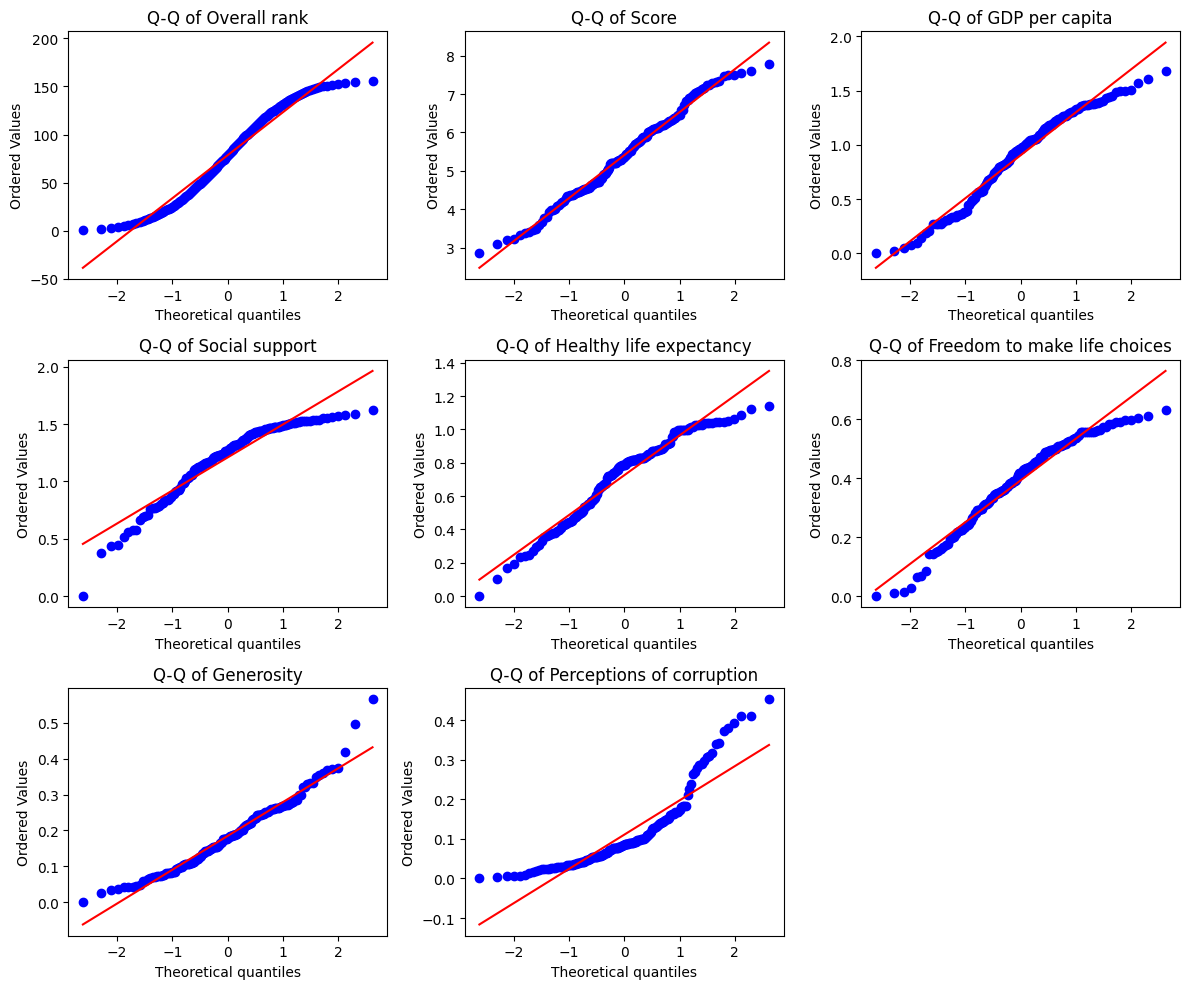

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Q-Q графік: Якщо точки на графіку розташовані близько до прямої, це також свідчить про нормальність.

plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features):
    # Отримання даних для поточної ознаки
    data = df[feature].dropna()  # Видалення пропущених значень
    plt.subplot(3, 3, i + 1)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q of {feature}')

plt.tight_layout()
plt.show()

In [238]:
# Тести нормальності: якщо p-value більше 0.05, це свідчить про нормальний розподіл даних.

for feature in numeric_features:
    data = df[feature].dropna()  # Видалення пропущених значень

    # Тест Шапіро-Уілка
    shapiro_test = stats.shapiro(data)
    print(f'{feature} - Shapiro-Wilk Test:')
    print(f'Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')


    # Тест Колмогорова-Смірнова
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    result = 'Нормальний розподіл' if ks_test.pvalue > 0.05 and  shapiro_test.pvalue > 0.05 else 'Ненормальний розподіл'
    print(f'{feature} - Kolmogorov-Smirnov Test:')
    print(f'Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}')
    print(f'Result: {result}')

    print()  # Додати порожній рядок між результатами для зручності читання

Overall rank - Shapiro-Wilk Test:
Statistic: 0.95461286237505, p-value: 5.743278551354504e-05
Overall rank - Kolmogorov-Smirnov Test:
Statistic: 0.059664058716690005, p-value: 0.6135575436664413
Result: Ненормальний розподіл

Score - Shapiro-Wilk Test:
Statistic: 0.987200932322943, p-value: 0.163250395576505
Score - Kolmogorov-Smirnov Test:
Statistic: 0.05780215493783686, p-value: 0.6527750342517223
Result: Нормальний розподіл

GDP per capita - Shapiro-Wilk Test:
Statistic: 0.9652908380897589, p-value: 0.0005821059977069535
GDP per capita - Kolmogorov-Smirnov Test:
Statistic: 0.07830294427728335, p-value: 0.27952613640231194
Result: Ненормальний розподіл

Social support - Shapiro-Wilk Test:
Statistic: 0.9073697296182384, p-value: 2.157676302400305e-08
Social support - Kolmogorov-Smirnov Test:
Statistic: 0.10332285805866337, p-value: 0.06654285186929632
Result: Ненормальний розподіл

Healthy life expectancy - Shapiro-Wilk Test:
Statistic: 0.9534112235700445, p-value: 4.4978818809381614e

Тести підтверджують, що нормальний розподіл тільки розподіл Score

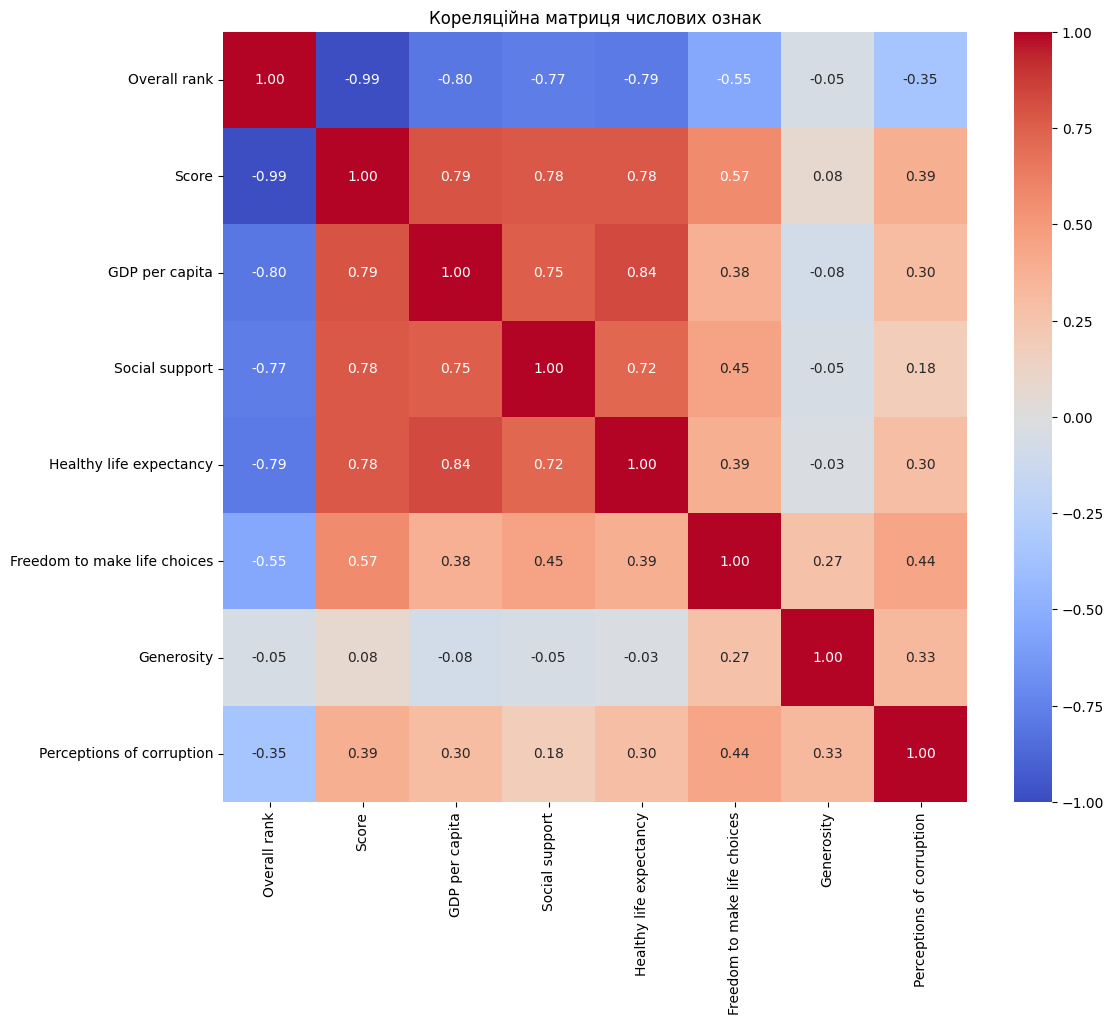

In [239]:
# Вибір тільки числових ознак з DataFrame
df_numeric = df[numeric_features]

# Обчислення кореляційної матриці
correlation_matrix = df_numeric.corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Кореляційна матриця числових ознак')
plt.show()

# Аналіз таблиці кореляцій:

* Overall rank:
  
  Кореляція між Score і Overall rank: Значення -0.989 показує сильний негативний лінійний зв'язок. Оскільки це не первинні дані, а отримані розрахунком, це нічого нам не говорить, лище підтверджує логічний зв'язок. Припускаю, що спочатку розраховувався Score, а вже на основі його сортування будувався Rank.

* Score:

  Зрозуміло що Score розраховується на на основі ВВП на душу населення, Соціальної підтримки і Очікуваній тривалості здорового життя (мабуть в рівній мірі) про шо свідчить одноково високий позативнй зв'язок. Свобода вибору життєвого шляху та Відчуття корупції мабуть впливають на Score побічно, через кореляцію з вказаними. Щедрість населення на оцінку не впливає.

*  GDP per capital:

  - Сильний позитивний зв'язок з Healthy life expectancy (0.835) свідчить про те, що більший ВВП на душу населення асоціюється з більшим очікуваним терміном життя.
  - Також помірний позитивний зв'язок з Social support (0.755), що логічно, бо виший ВВП дозволяє краще наповнювати бюджет через податки з якого й фінансувати соц. підримку.  

* Healthy life expectancy помірно корелює з Social support (0.719). Це значення вказує на те, що зі збільшенням соціальної підтримки, як правило, зростає і очікувана тривалість здорового життя.

*  Помірний позитивний зв'язок між Freedom to make life choices і Perceptions of corruption (0.439), показує, що більша свобода вибору часто асоціюється з меншими рівнями корупції.

* Кореляція між Generosity і іншими ознаками:

  - Низька кореляція між Generosity та більшістю ознак свідчить про те, що щедрість менше пов'язана з ВВП на душу населення чи іншими показниками.

* Кореляція між Perceptions of corruption та Freedom to make life choices (0.439). Це може свідчити про те, що більша свобода вибору може бути пов'язана з нижчими рівнями сприйняття корупції.

Загалом, найбільш виражені зв'язки спостерігаються між Score, GDP per capita та Healthy life expectancy, які мають сильні позитивні кореляції між собою. Generosity виглядає менш пов'язаною з іншими показниками.



In [240]:
# Map
import plotly.express as px

fig = px.choropleth(df,
                    locations = "Country or region",
                    color = "Score",
                    locationmode = "country names",
                    )
fig.update_layout(title = "Happiness Index 2017")
fig.show()

In [241]:
def data_scale(data, scaler_type='minmax'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    if scaler_type == 'std':
        scaler = StandardScaler()
    if scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res


selected_columns = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
data = df[selected_columns]

data_scaled = data_scale(data, scaler_type='minmax')
data_scaled = data_scale(data_scaled, scaler_type='std')
data_scaled = data_scale(data_scaled, scaler_type='norm')

df_scaled = pd.DataFrame(data_scaled, columns=[data.columns])
df_scaled.describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.014228,0.043618,0.028710,0.019387,-0.059463,-0.072634
std,0.411177,0.393526,0.404027,0.424945,0.436033,0.369306
min,-0.828698,-0.816106,-0.911579,-0.865970,-0.863321,-0.771557
25%,-0.343515,-0.297465,-0.320302,-0.309475,-0.442742,-0.331056
50%,0.095214,0.139501,0.161126,0.097581,-0.025436,-0.135664
75%,0.366362,0.350343,0.353088,0.343713,0.302046,0.161138
max,0.835189,0.776789,0.772500,0.894398,0.944305,0.785726


## Порівняння:
* Оригінальний набір даних: Статистики мають різні середні значення та стандартні відхилення залежно від масштабу кожної колонки.
* Стандартизований набір даних:
    - Середнє значення (mean) для кожної колонки близьке до 0.4.
    - Стандартне відхилення (std) близьке до 1.
    - min та max біля -0.8, та 0.8 відповідно

## Висновки:
Стандартизація призводить до того, що всі числові ознаки в стандартизованому наборі даних мають однаковий масштаб, що дозволяє уникнути впливу різних масштабів під час моделювання.

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 1 2 1 2 1 2 2 1 1 2
 1 1 2 2 1 2 2 2 2 2 1 1 2 2 2 1 1 2 2 2 2 2 1 2 1 2 2 1 2 0 1 2 1 1 1 1 0
 1 2 2 1 1 2 1 1 1 1 0 2 1 1 1 1 1 0 1 2 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 2 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0]


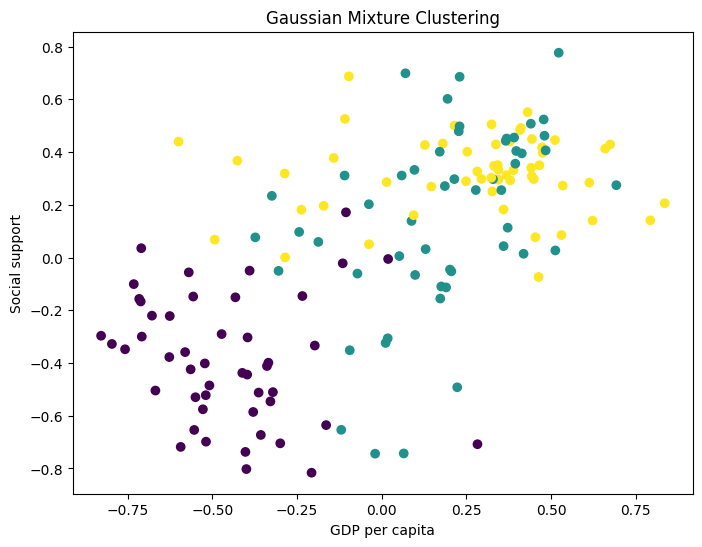

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2


In [242]:
from sklearn.mixture import GaussianMixture
selected_columns = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
gmm = GaussianMixture(n_components=3, random_state=42)  # Вкажіть бажану кількість кластерів (n_components)

# 4. Навчання моделі та передбачення кластерів
gmm.fit(data_scaled)
clusters2d = gmm.predict(data_scaled)

# 5. Додавання кластерних міток до DataFrame
print(clusters2d)
df['Cluster'] = clusters2d

# 6. Візуалізація кластерів (на прикладі двох ознак)
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['GDP per capita'], df_scaled['Social support'], c=clusters2d, cmap='viridis')
plt.title('Gaussian Mixture Clustering')
plt.xlabel('GDP per capita')
plt.ylabel('Social support')
plt.show()

# 7. Виведення кластерних міток
df.head()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 2 1 0 1 0 1 1 2
 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 2 1 2 2 2 0 2 2 0 0 0 0 1 0 0 2
 2 0 2 2 0 0 2 0 2 2 0 2 0 2 0 2 2 2 1 0 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2]


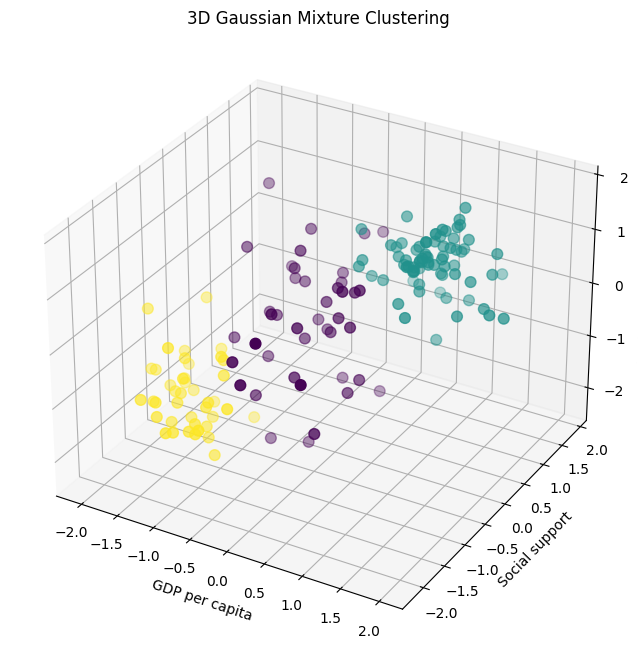

In [243]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Припустимо, у вас є датафрейм df, і ви обрали три ознаки
selected_features = df_scaled[['GDP per capita', 'Social support', 'Healthy life expectancy']]

# Стандартизація даних
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_features)

# Побудова моделі Gaussian Mixture
gm = GaussianMixture(n_components=3, random_state=0)
gm.fit(X_scaled)
clusters3d = gm.predict(X_scaled)

# Додавання міток кластерів до датафрейму
print(clusters3d)
df['Cluster'] = clusters3d

# Візуалізація в 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters3d, cmap='viridis', s=60)
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Social support')
ax.set_zlabel('Healthy life expectancy')
plt.title('3D Gaussian Mixture Clustering')
plt.show()

[2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2
 2 2 2 1 2 1 2 0 1 2 2 2 1 2 1 2 2 2 1 2 2 0 2 0 2 1 2 1 2 0 2 1 1 0 2 2 0
 2 2 2 1 2 2 2 2 1 2 0 0 2 1 1 2 1 1 1 0 1 0 2 0 0 0 1 0 0 2 0 1 1 1 0 0 0
 0 1 0 0 1 2 0 1 0 0 0 0 1 0 2 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0]
Means of components: 
 [[-0.46716912]
 [ 0.05008497]
 [ 0.39406858]]
Covars of components: 
 [[[0.03367381]]

 [[0.03680883]]

 [[0.02394216]]]


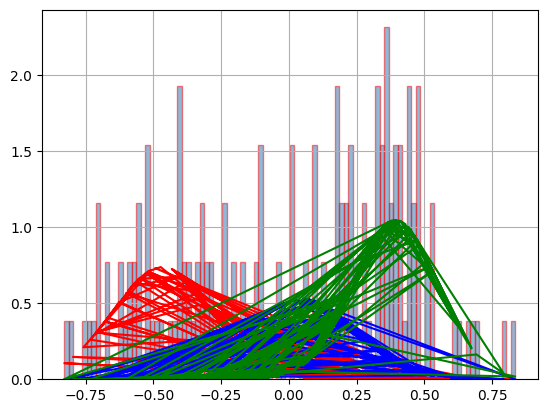

In [244]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.ticker as tkr
import scipy.stats as stats

import numpy as np
from sklearn.mixture import GaussianMixture
# X = df_scaled.values
X = df_scaled['GDP per capita'].values

data = X.reshape(-1, 1)

gm = GaussianMixture(n_components=3, random_state=0).fit(data)
weights = gm.weights_
means = gm.means_
covars = gm.covariances_

# Додавання кластерів до DataFrame


clusters = gm.predict(data)
print(clusters)
df['Cluster'] = clusters

print('Means of components: \n', means)
print('Covars of components: \n',covars)

plt.hist(data, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
plt.plot(data,weights[0]*stats.norm.pdf(data,means[0],np.sqrt(covars[0])), c='red')
plt.plot(data,weights[1]*stats.norm.pdf(data,means[1],np.sqrt(covars[1])), c='blue')
plt.plot(data,weights[2]*stats.norm.pdf(data,means[2],np.sqrt(covars[2])), c='green')
plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()


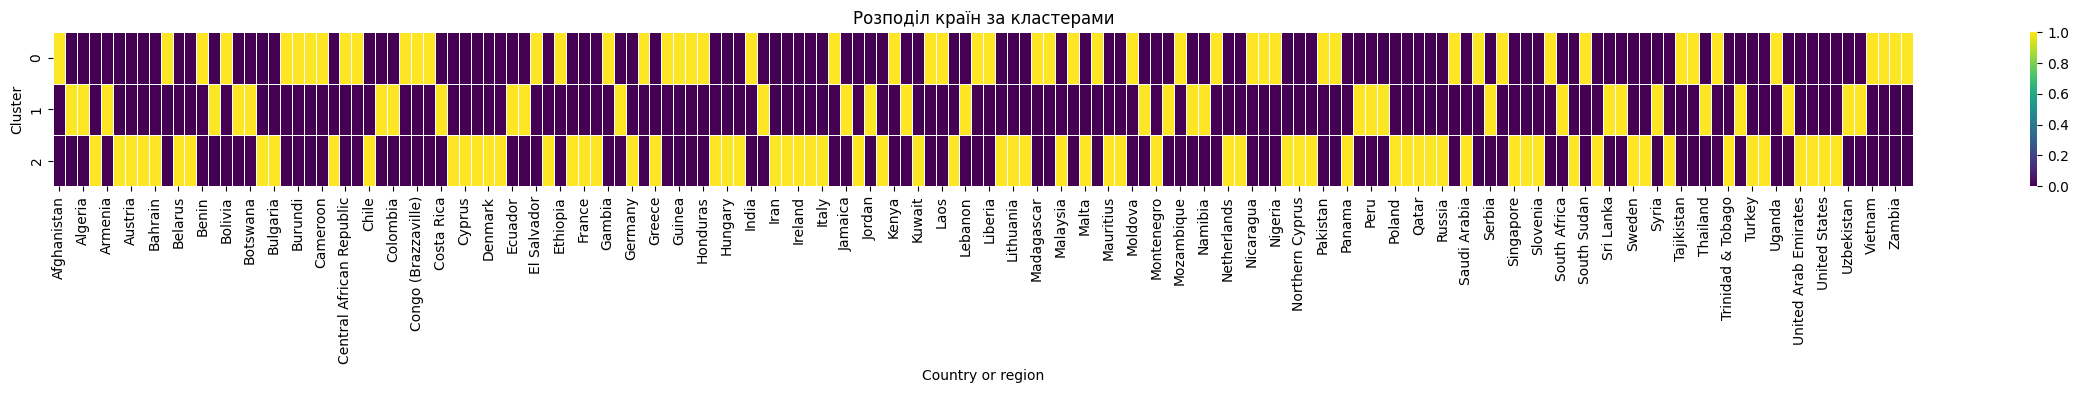

In [125]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# датафрейм df з колонками 'Country or region' та 'Cluster'
# Групуємо дані за країнами та кластерами
cluster_distribution = df.groupby(['Cluster', 'Country or region']).size().unstack(fill_value=0)

# Побудова теплової мапи
plt.figure(figsize=(30, 2))
sns.heatmap(cluster_distribution, cmap='viridis', annot=False, linewidths=.5)
plt.title('Розподіл країн за кластерами')
plt.xlabel('Country or region')
plt.ylabel('Cluster')
plt.xticks(rotation=90)
plt.show()

In [126]:
# Map
import plotly.express as px

fig = px.choropleth(df,
                    locations = "Country or region",
                    color = "Cluster",
                    locationmode = "country names",
                    )
fig.update_layout(title = "Clusters")
fig.show()


('GDP per capita',)
[2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2
 2 2 2 1 2 1 2 0 1 2 2 2 1 2 1 2 2 2 1 2 2 0 2 0 2 1 2 1 2 0 2 1 1 0 2 2 0
 2 2 2 1 2 2 2 2 1 2 0 0 2 1 1 2 1 1 1 0 1 0 2 0 0 0 1 0 0 2 0 1 1 1 0 0 0
 0 1 0 0 1 2 0 1 0 0 0 0 1 0 2 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0]
Means of components: 
 [[-0.46716912]
 [ 0.05008497]
 [ 0.39406858]]
Covars of components: 
 [[[0.03367381]]

 [[0.03680883]]

 [[0.02394216]]]


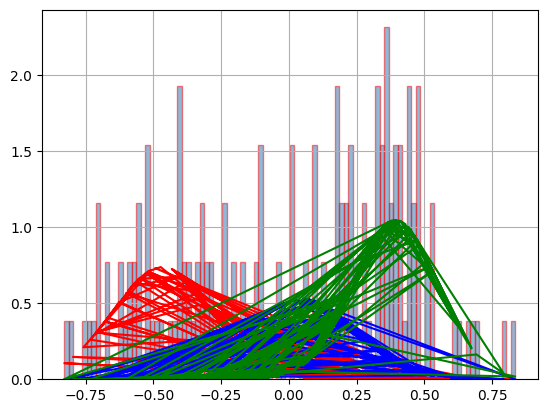

('Social support',)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 2 0 0 0 0 2 0 2 0 0 2 2 0 1 0 0 0 0 0 0 1
 2 2 0 2 0 2 0 2 0 0 2 0 0 2 1 2 2 2 2 0 0 1 0 1 1 2 2 1 1 2 1 0 1 0 2 2 2
 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 0 2 1 0 1 2 1 1 1 1 1 1 1 1 2 1 2 1 2
 1 1 2 1 1 1 1 1]
Means of components: 
 [[ 0.37175919]
 [-0.48954686]
 [-0.01345007]]
Covars of components: 
 [[[0.01834497]]

 [[0.03297419]]

 [[0.01421926]]]


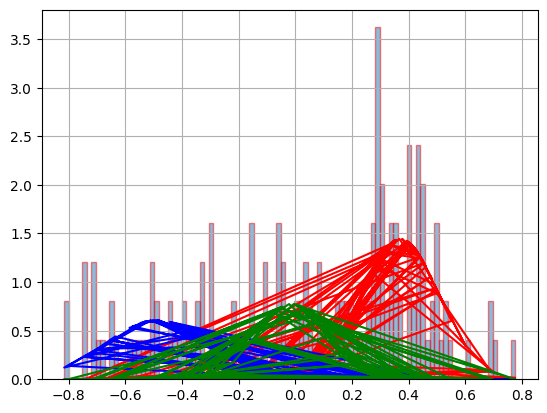

('Healthy life expectancy',)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 0 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 1 0 1 2 0 1 2 0
 2 2 2 2 2 2 2 2 0 2 1 0 1 0 0 0 2 0 2 2 1 1 2 1 1 0 2 1 1 1 1 1 2 2 1 0 1
 1 1 1 1 2 2 1 0 1 1 1 1 2 0 1 1 1 1 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1]
Means of components: 
 [[ 0.05562038]
 [-0.46450345]
 [ 0.35513217]]
Covars of components: 
 [[[0.04251779]]

 [[0.04148427]]

 [[0.02503193]]]


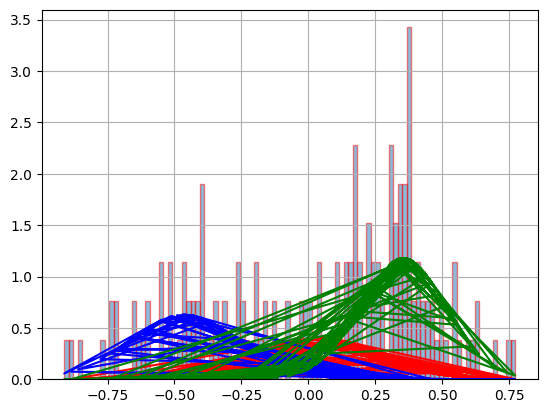

('Freedom to make life choices',)
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 2 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 1 1 0 2 2 0 2 1
 1 0 0 2 2 0 2 2 1 1 0 0 1 2 0 1 2 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 2 0 2 1
 0 1 1 1 2 1 1 1 1 0 2 0 2 0 2 1 1 1 0 0 1 2 1 1 1 2 0 1 0 1 2 2 1 1 1 2 0
 2 0 2 0 0 2 1 2]
Means of components: 
 [[ 0.36144484]
 [-0.14728794]
 [-0.64604947]]
Covars of components: 
 [[[0.04050158]]

 [[0.03083617]]

 [[0.01116819]]]


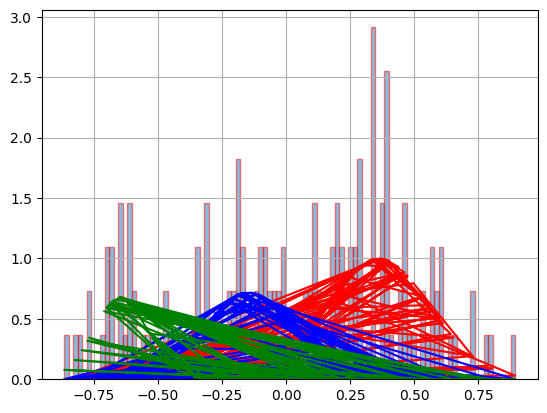

('Generosity',)
[2 2 0 0 0 2 0 0 0 0 0 2 0 2 0 0 0 2 0 1 0 0 1 1 0 2 2 1 2 2 1 1 1 2 1 2 0
 1 2 1 0 1 1 2 2 0 1 1 2 1 2 0 1 2 1 1 0 1 0 1 1 1 2 2 1 1 0 1 1 1 2 1 2 0
 1 0 1 0 1 0 1 1 0 2 2 0 0 1 1 1 2 0 1 1 0 2 1 0 2 0 1 2 1 1 0 1 2 1 0 1 2
 2 1 2 2 1 0 2 1 0 0 1 2 1 2 2 2 2 0 0 0 2 2 2 1 0 1 0 2 2 2 0 2 1 2 2 0 1
 0 2 1 2 0 2 2 2]
Means of components: 
 [[ 0.4265294 ]
 [-0.54086703]
 [ 0.01224357]]
Covars of components: 
 [[[0.04632922]]

 [[0.02849573]]

 [[0.03054059]]]


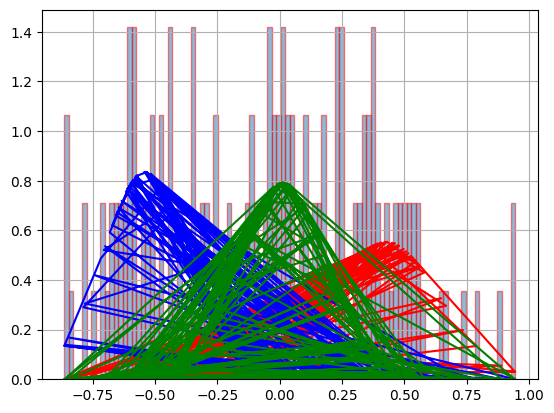

('Perceptions of corruption',)
[2 2 2 1 2 2 2 2 2 2 2 1 0 2 2 2 2 2 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 2 0 0 1
 0 0 0 2 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 2 0 1
 0 2 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1
 1 1 0 2 1 0 0 1]
Means of components: 
 [[-0.32988637]
 [ 0.02058502]
 [ 0.63607623]]
Covars of components: 
 [[[0.03425607]]

 [[0.05583173]]

 [[0.01175812]]]


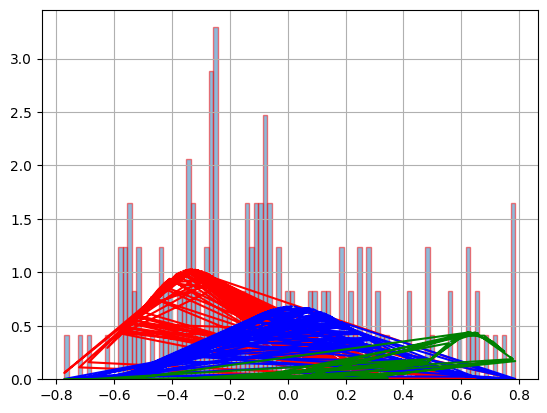

In [245]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.ticker as tkr
import scipy.stats as stats
import copy
import numpy as np
from sklearn.mixture import GaussianMixture

# X = df_scaled['GDP per capita'].values

df_clasters = pd.DataFrame()

for column in df_scaled.columns:
    print(column)
    X = df_scaled[column].values

    data = X.reshape(-1, 1)

    gm = GaussianMixture(n_components=3, random_state=0).fit(data)
    weights = gm.weights_
    means = gm.means_
    covars = gm.covariances_

    # Додавання кластерів до DataFrame


    clusters = gm.predict(data)
    print(clusters)
    df_clasters[column] = clusters
    print('Means of components: \n', means)
    print('Covars of components: \n',covars)

    plt.hist(data, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
    plt.plot(data,weights[0]*stats.norm.pdf(data,means[0],np.sqrt(covars[0])), c='red')
    plt.plot(data,weights[1]*stats.norm.pdf(data,means[1],np.sqrt(covars[1])), c='blue')
    plt.plot(data,weights[2]*stats.norm.pdf(data,means[2],np.sqrt(covars[2])), c='green')
    plt.rcParams['agg.path.chunksize'] = 10000

    plt.grid()
    plt.show()

In [246]:
df_clasters['GPD, Social Support, Healthe expectancy'] = clusters2d
df_clasters['GPD & Social Support'] = clusters3d
# df_clasters['Country or region'] = df['Country or region']
df_clasters['Score'] = df['Score']
df_clasters.head()

,"(GDP per capita,)","(Social support,)","(Healthy life expectancy,)","(Freedom to make life choices,)","(Generosity,)","(Perceptions of corruption,)","GPD, Social Support, Healthe expectancy",GPD & Social Support,Score
0,2,0,2,0,2,2,2,1,7.769
1,2,0,2,0,2,2,2,1,7.600
2,2,0,2,0,0,2,2,1,7.554
3,2,0,2,0,0,1,2,1,7.494
4,2,0,2,0,0,2,2,1,7.488


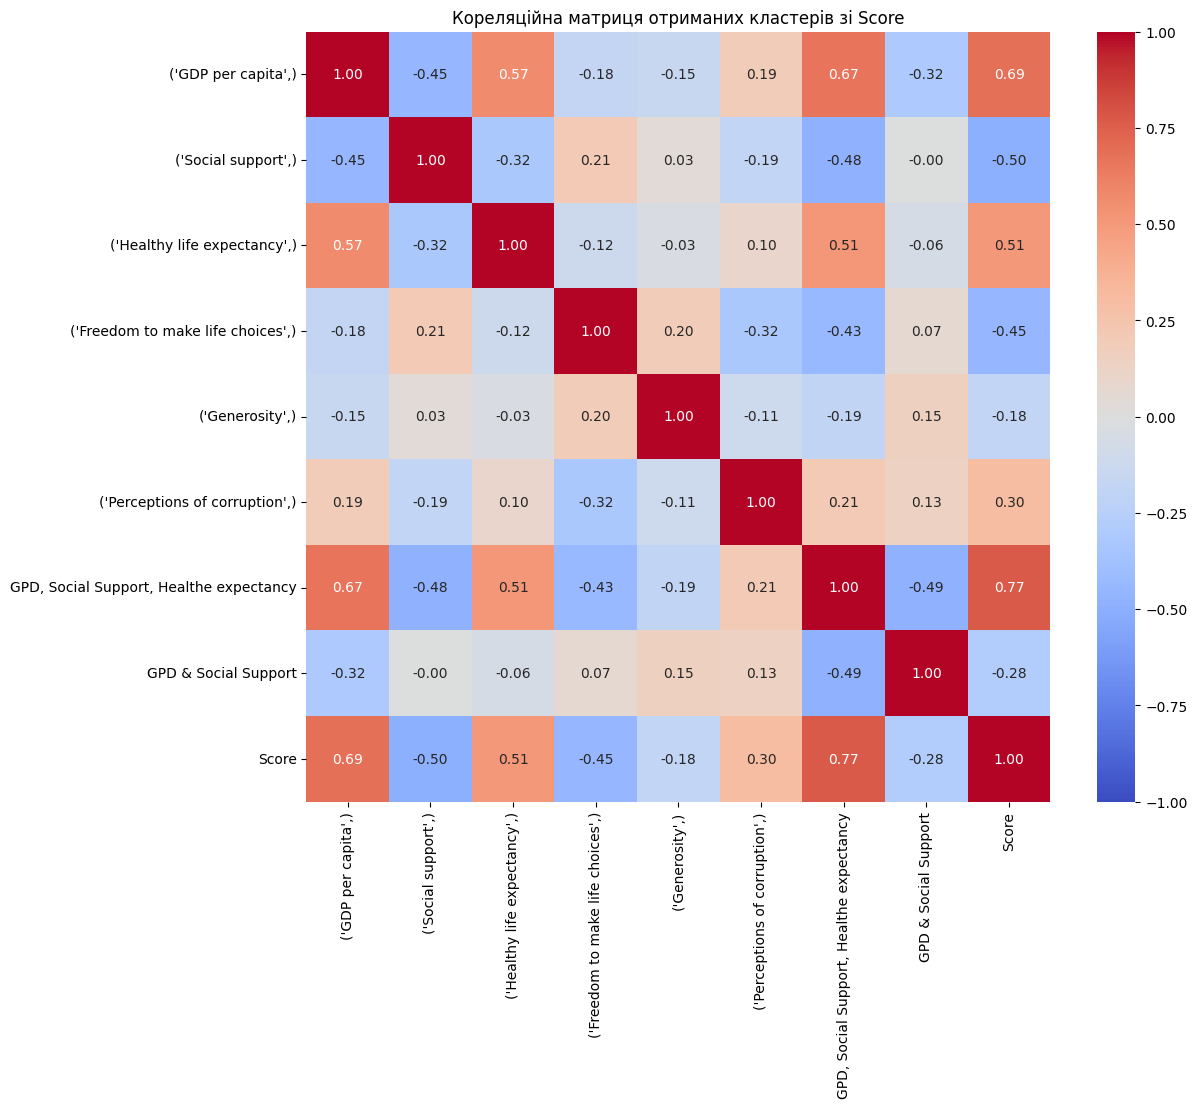

In [247]:
# Вибір тільки числових ознак з DataFrame
#

# Обчислення кореляційної матриці
correlation_matrix = df_clasters.corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Кореляційна матриця отриманих кластерів зі Score')
plt.show()

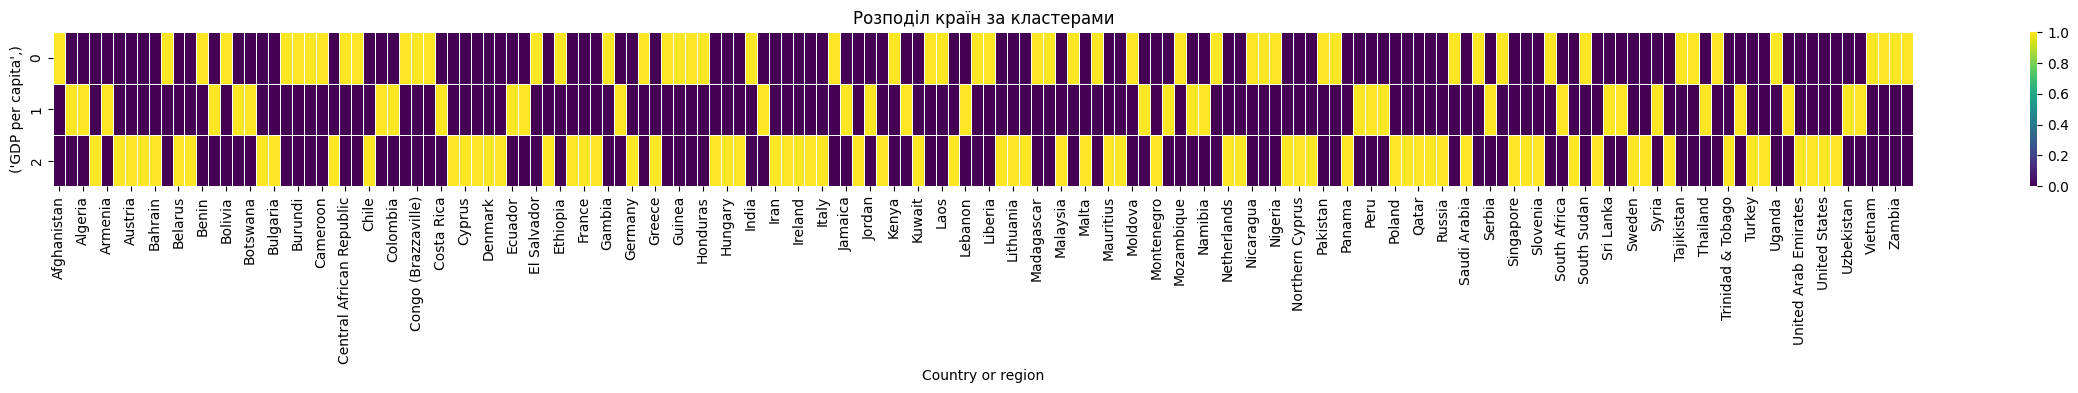

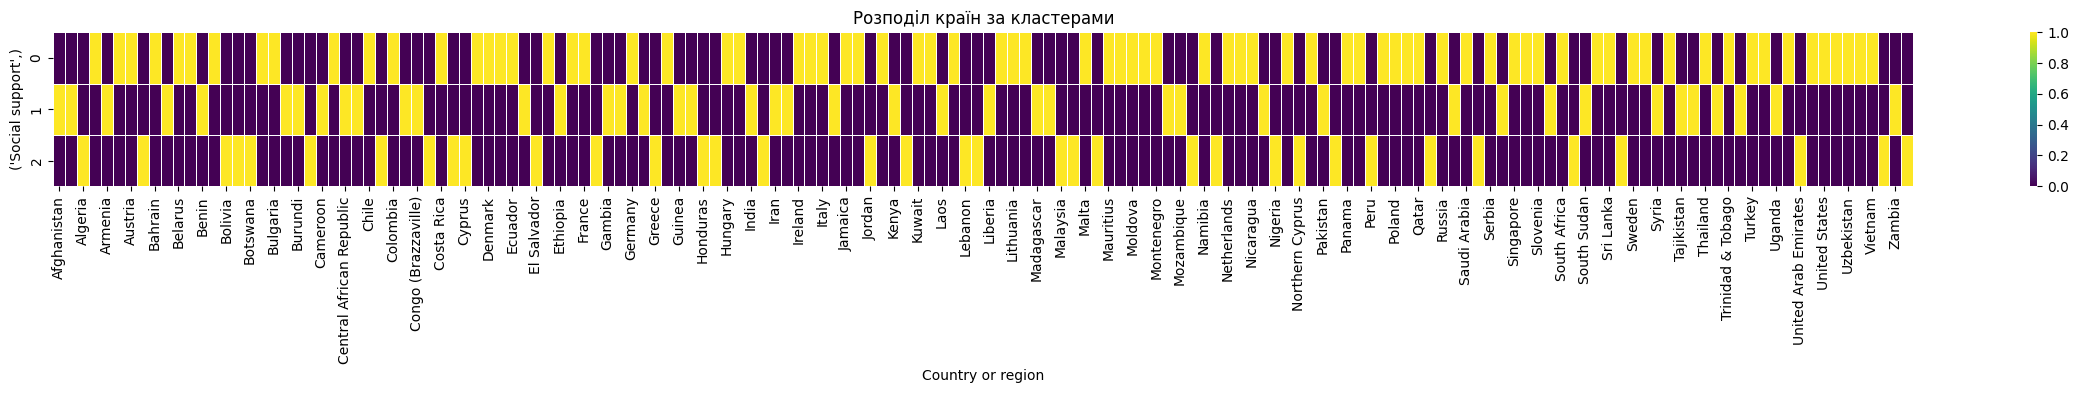

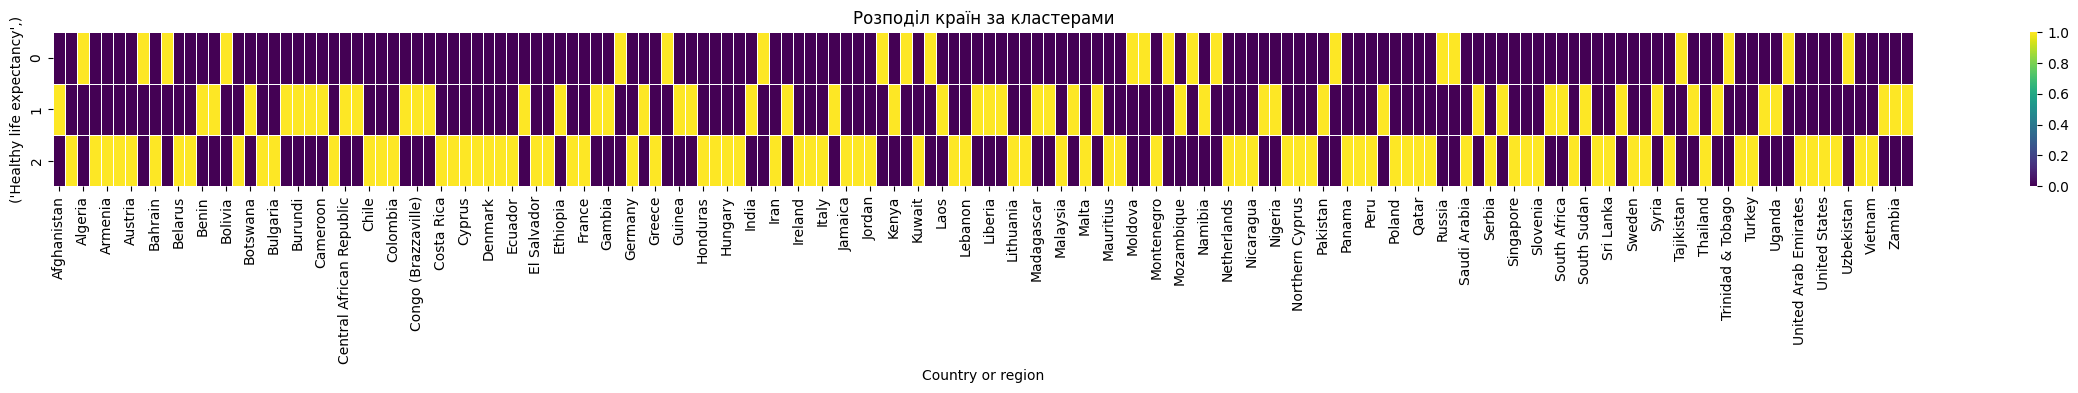

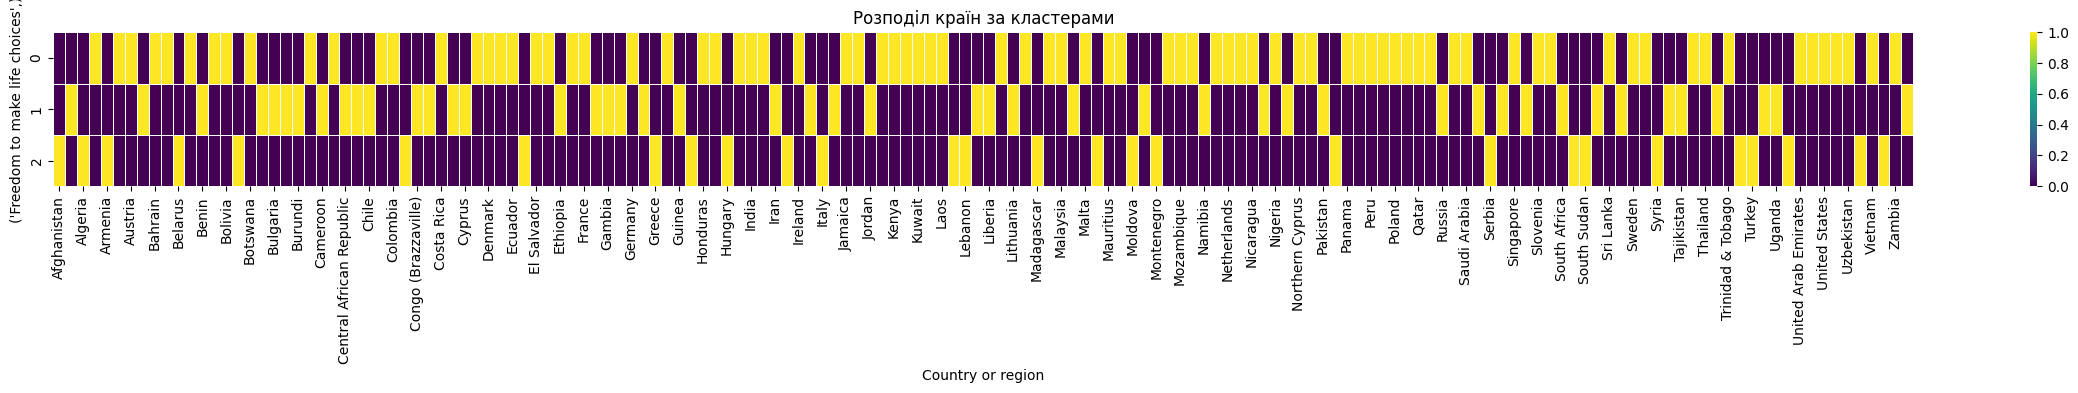

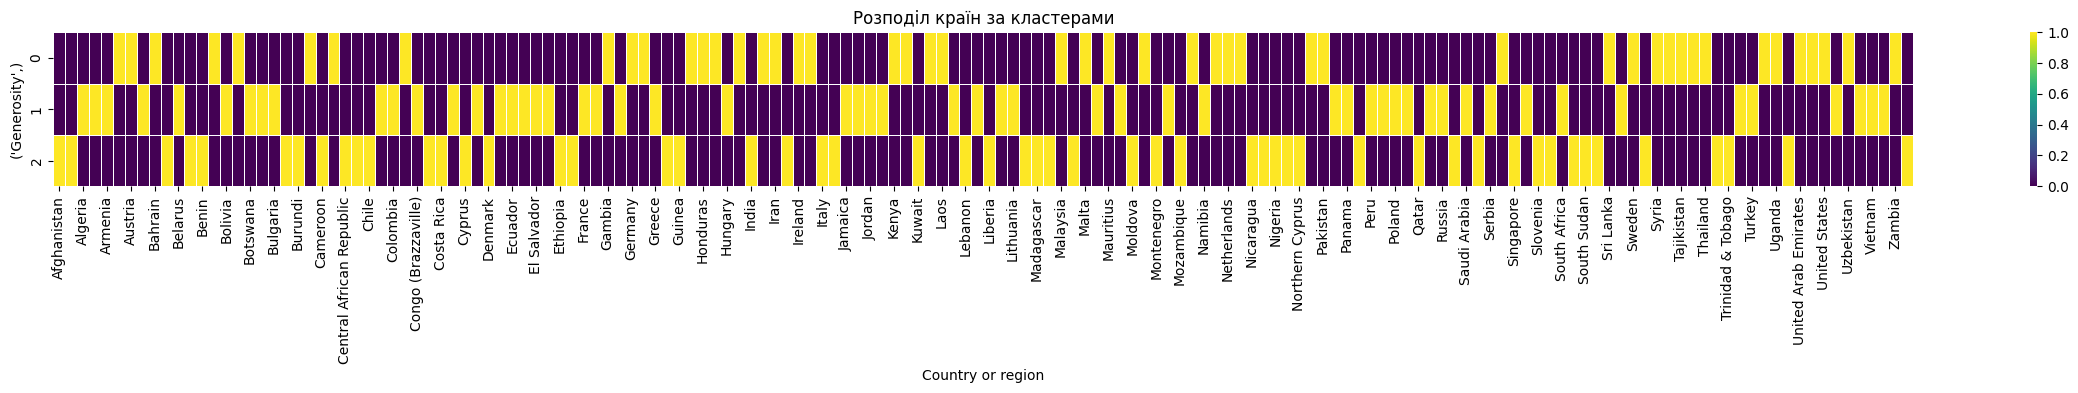

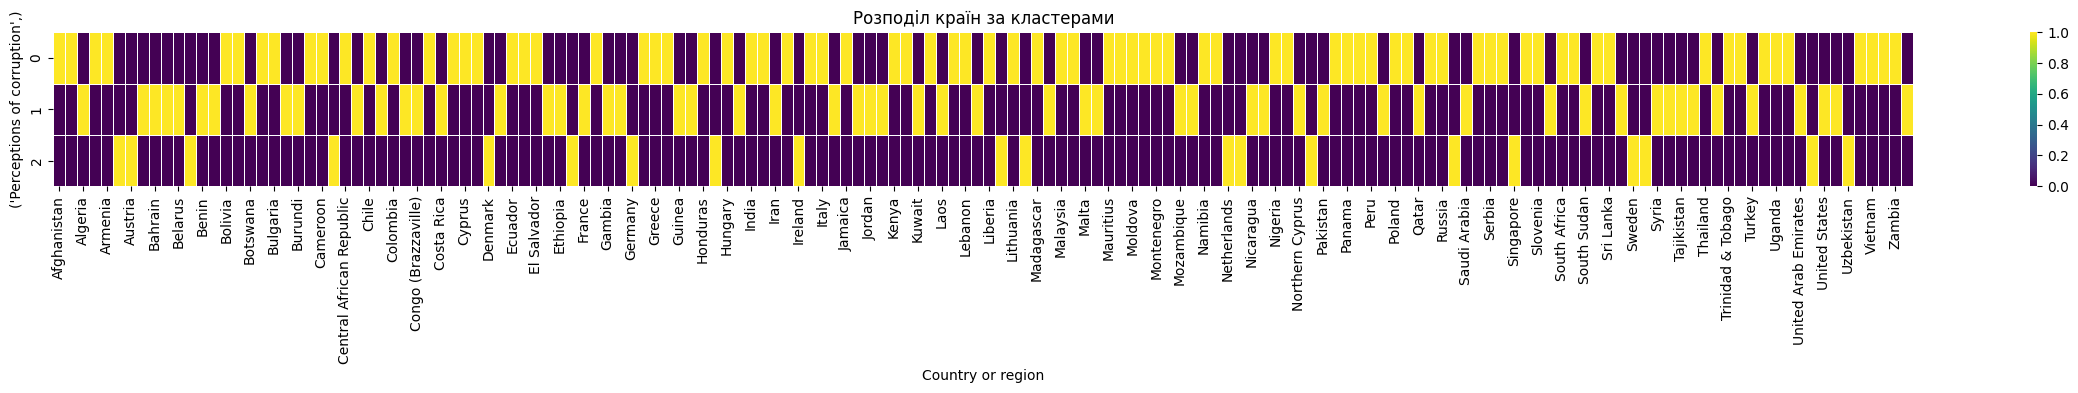

In [250]:
df_clasters['Country or region'] = df['Country or region']

for column in [              ('GDP per capita',),               ('Social support',),
            ('Healthy life expectancy',), ('Freedom to make life choices',),
                         ('Generosity',),    ('Perceptions of corruption',)]:
    cluster_distribution = df_clasters.groupby([column, 'Country or region']).size().unstack(fill_value=0)
    # df_combined = df_scaled.merge(df_clasters[['Country or region', 'Cluster']], on='Country or region')

    # Побудова теплової мапи
    plt.figure(figsize=(30, 2))
    sns.heatmap(cluster_distribution, cmap='viridis', annot=False, linewidths=.5)
    plt.title('Розподіл країн за кластерами')
    plt.xlabel('Country or region')
    plt.ylabel(column)
    plt.xticks(rotation=90)
    plt.show()

        # Map
    # fig = px.choropleth(df_clasters,
    #                     locations = "Country or region",
    #                     color = column,
    #                     locationmode = "country names",
    #                     )
    # fig.update_layout(title = "Clusters")
    # fig.show()

Аналіз результатів моделі Gaussian Mixture

1. Середні значення компонент (Means of components):

* Кластер 1: -0.4672
* Кластер 2: 0.0501
* Кластер 3: 0.3941

  Значення можна трактувати як центр кожного кластеру в просторі ознак.

2. Коваріаційні матриці (Covars of components):

* Кластер 1: 0.0337
* Кластер 2: 0.0368
* Кластер 3: 0.0239

Коваріаційні матриці показують дисперсію кожного кластеру. Вони вказують на те, як розкидані значення навколо центру кластера. Нижчі значення означають, що кластер більш компактний (менш розсіяний), тоді як вищі значення вказують на більшу варіативність даних в кластері.

3. З отриманих результатів можна зробити висновок, що:

* Кластер 1 має найбільший від'ємний центр (значення близьке до -0.467) і розсіяність трохи більша, ніж у кластеру 3.
* Кластер 2 розташований ближче до нуля і має найбільшу дисперсію.
* Кластер 3 має найменшу дисперсію та найбільше додатнє значення середнього.



# Висновки на основі кластерів для різних ознак

Оскільки 'Score' в датасеті сортований від найбільшого до найменшого будемо вважати гарною кластерицію, в якій зберігається послідовність, кореляція зі 'Score'

## Загальний вигляд кластерів для кожної ознаки:

* 'GDP per capita':
Кластери розподілені по країнах з трьома основними кластерами. Зазвичай значення ознаки в цьому випадку варіюються від низьких до високих значень.

* 'Social support':
Більшість країн мають кластер 0 або 2, що може свідчити про те, що країни з низькою соціальною підтримкою часто потрапляють в один кластер.

* 'Healthy life expectancy':
Діапазон кластерів досить широкий, і кластери розподілені по всіх значеннях очікуваної тривалості життя.

* 'Freedom to make life choices':
Зазначена варіація в значеннях може показувати, що країни з різними рівнями свободи прийняття рішень потрапляють в різні кластери.

* 'Generosity':
Значення цього показника досить варіативні, і це може впливати на розподіл країн по кластерам.

* 'Perceptions of corruption':
Кластери розподілені по всіх значеннях сприйняття корупції, з деякими країнами з високими показниками корупції потрапляючими в один кластер.

Найкраще в плані послідовості серед одиночних ознак показала ій ознаці показала 'GDP per capita'(кореляція 0.69)

* Кластеризація по 2-м ознакам ('GDP per capita' та 'Social support') кращого результату не виявила.

* Кластеризація по 3-м ознакам ('GDP per capita', 'Social support' і 'Healthy life expectancy') показала найкращий результат (кореляція 0.77) проте далеко не ідеальний.

## Вплив різного набору ознак на кластеризацію:

* Ознаки окремо: Кластеризація за однією ознакою може не відображати повної картини про групи країн. Наприклад, кластеризація за GDP per capita може відображати економічний статус, але не враховує соціальні фактори.
* Комбінації ознак: Використання кількох ознак разом може допомогти виявити більш чіткі групи країн. Наприклад, кластеризація на основі GDP per capita і Social support може дати змогу краще розрізнити групи країн з різними економічними і соціальними характеристиками.


# Висновки

Кластеризація з різними ознаками може дати різні результати в залежності від того, які характеристики ви обираєте для аналізу. Тестування різних комбінацій ознак дозволяє знайти найбільш корисні для розуміння структури даних і відображення реальних груп країн. Важливо також враховувати, як результати кластеризації співвідносяться з реальними даними, такими як Score, щоб оцінити корисність отриманих кластерів.